### Introduction to Data Science assignment 4
### Professors: Bahrak & Yaghoob Zadeh
#### Mohamad Mahdi Samadi and Kasra Ghorbani

In [40]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data using the required library, and convert it into a pandas Dataframe and print the top 10 rows.

In [41]:
diabetes = load_diabetes(scaled=False)
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

We check first 10 rows to find out the general structure of the data.

In [42]:
df.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0


Checking if there are any non-numerical column in the dataset.

In [43]:
df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

Here we check whether or not there are any missing values in our Dataframe.

In [44]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

## Normalization
There are different methods for normalizing. Two most important of them are:
1. **Min-Max Normalization:** Also known as rescaling, this method linearly transforms the values of a feature to a specific range, typically between 0 and 1 or -1 to 1.

#### $$ \frac{x - x_{min}}{x_{max} - x_{min}} $$

2. **Standardization:** Also known as Z-score normalization, this method transforms the feature values by subtracting the mean and scaling to unit variance. It results in a distribution that is centered around 0, with a standard deviation of 1.

#### $$ \frac{x - \mu}{\sigma} $$

Here we used Min-Max Normalization.



In [45]:
def normalize_data(df):
    for col in df.columns:
        min, max = df[col].min(), df[col].max()
        df[col] = (df[col] - min) / (max - min)
    return df
df = normalize_data(df=df)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459817,0.451668,0.367725,0.360889,0.291996,0.485560,0.503942
std,0.218484,0.499561,0.182567,0.194807,0.169647,0.151460,0.167977,0.182010,0.183366,0.174187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357542,0.382576
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478062,0.500000
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Spliting the data into two disjoint subsets that will be used as train and test data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df, diabetes.target, test_size=0.05, random_state=17)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,diabetes.target.shape)

(419, 10) (23, 10) (419,) (23,) (442,)


## Loss Functions Implementation

#### $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

#### $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

#### $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

#### $R^2 = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

#### $\bar{R}^2 = 1 - \left(1 - R^2\right)\frac{n-1}{n-p-1}$

### $ {R}^{2} $ vs $ \text{Adjusted } {R}^{2} $
**R-squared:** Also known as the coefficient of determination, it represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, with higher values indicating that the model explains more of the variance in the data. An R-squared of 1 means that the model is a perfect fit, while an R-squared of 0 indicates that the model doesn't explain any of the variance in the data.

**Adjusted R-squared:** Adjusted R-squared is a modified version of R-squared that takes into account the number of independent variables in the model. It penalizes the R-squared value for models with more variables, helping to provide a more accurate view of the model's explanatory power. Like R-squared, it also ranges from 0 to 1.

**Differences:** R-squared measures the strength of the relationship between the dependent and independent variables, while Adjusted R-squared provides a more reliable measure of the model's goodness-of-fit by considering the number of variables in the model. Also R-squared tends to increase as you add more variables to the model, even if those variables don't significantly contribute to the model's predictive power. Adjusted R-squared only increases if the new variable improves the model's performance more than what would be expected by chance.


In [47]:
def calc_MSE(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    SE = 0 # squared error
    for i in range(n):
        SE += (y_true_vals[i] - y_pred_vals[i])**2
    MSE = SE / n
    return MSE

def calc_MAE(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    AE = 0 # absolute error
    for i in range(n):
        AE += abs(y_true_vals[i] - y_pred_vals[i])
    MAE = AE / n
    return MAE
    
def calc_RMSE(y_pred_vals, y_true_vals):
    RMSE = np.sqrt(calc_MSE(y_pred_vals, y_true_vals))
    return RMSE

def calc_R2(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    RSS, TSS = 0, 0
    mu = np.mean(y_true_vals)
    for i in range(n):
        RSS += (y_true_vals[i] - y_pred_vals[i]) ** 2
        TSS += (y_true_vals[i] - mu) ** 2
    return 1 - (RSS / TSS)

def calc_Adjusted_R2(y_pred_vals, y_true_vals):
    R2 = calc_R2(y_pred_vals, y_true_vals)
    n = len(df)
    p = len(diabetes["feature_names"])
    adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
    return adjusted_R2

## Building Model

In [48]:
model = LinearRegression().fit(X=X_train, y=y_train)
y_train_pred = model.predict(X=X_train)
y_test_pred = model.predict(X=X_test)

## Evaluating Model

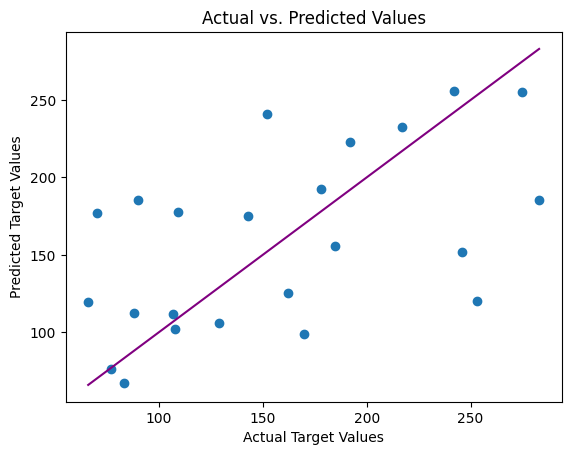

In [49]:
def draw_scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('Actual Target Values')
    plt.ylabel('Predicted Target Values')

    # Draw a line representing the ideal fit
    plt.plot([x.min(), x.max()], [x.min(), x.max()], color='purple')

    plt.title('Actual vs. Predicted Values')
    plt.show()

draw_scatter_plot(x=y_test, y=y_test_pred)

In [50]:
def analyse_model(y_train, y_train_pred, y_test, y_test_pred):
    MSE_train = calc_MSE(y_train_pred, y_train)
    MAE_train = calc_MAE(y_train_pred, y_train)
    RMSE_train = calc_RMSE(y_train_pred, y_train)
    R2_train = calc_R2(y_train_pred, y_train)
    Adj_R2_train = calc_Adjusted_R2(y_train_pred, y_train)

    MSE_test = calc_MSE(y_test_pred, y_test)
    MAE_test = calc_MAE(y_test_pred, y_test)
    RMSE_test = calc_RMSE(y_test_pred, y_test)
    R2_test = calc_R2(y_test_pred, y_test)
    Adj_R2_test = calc_Adjusted_R2(y_test_pred, y_test)

    data = {'MSE': [MSE_test, MSE_train], 'MAE': [MAE_test, MAE_train], 
            'RMSE': [RMSE_test, RMSE_train], 'R-squared': [R2_test, R2_train],
            'Adj R-squared': [Adj_R2_test, Adj_R2_train]}
    evaluation_df = pd.DataFrame(data, index=['test data', 'train data'])
    return evaluation_df

analyse_model(y_train, y_train_pred, y_test, y_test_pred)

,MSE,MAE,RMSE,R-squared,Adj R-squared
test data,3641.019527,46.813399,60.340861,0.206851,0.188448
train data,2828.676604,43.067073,53.185304,0.528685,0.517749


Based on these metrics, the model seems to be overfitting the training data, as all metrics suggest better performance on the training data compared to the test data. As a result of overfitting, the model might not generalize well to unseen data. I think these are the main reasons:
1. Small sample size we have.
2. Allocating a large portion of the data for training and a smaller portion for testing, Increases the chance of model getting overfitted.
3. a few test points might not reflect the model's true performance on unseen data.

## Ordinary Least Squares (OLS)

In [51]:
X_train_with_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_with_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     45.77
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.37e-60
Time:                        22:32:18   Log-Likelihood:                -2259.5
No. Observations:                 419   AIC:                             4541.
Df Residuals:                     408   BIC:                             4586.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0843     33.761      0.743      0.4

In [52]:
def analyse_features(model_ols, significance_level):
    df_analyse = pd.DataFrame(model_ols.pvalues, columns=["p-value"])
    df_analyse["impact on target"] = df_analyse["p-value"] < significance_level
    df_analyse["coefficients"] = model_ols.params
    return df_analyse.transpose()
analyse_features(model_ols=model_ols, significance_level=0.05)

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
p-value,0.457913,0.963685,0.000043,0.0,0.000004,0.425325,0.712746,0.660776,0.507356,0.000427,0.376337
impact on target,False,False,True,True,True,False,False,False,False,True,False
coefficients,25.084317,0.61218,-24.733101,136.001312,76.181657,-102.232331,42.87911,-28.732202,28.862512,165.867074,16.064357


**P-Value:** A low p-value (below the significance level) indicates that there is a strong evidence that the feature has a non-zero effect on the target variable. On the other hand, a high p-value suggests that the feature may not have a significant impact on the target variable.

**Coefficients:** The coefficients represent the estimated impact of each feature on the target variable. Positive coefficients indicate a positive relationship with the target, while negative coefficients indicate a negative relationship. Obviously larger coefficient means stronger impact on target variable.